In [2]:
library(tidyverse)
library(dplyr)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [3]:
heart_disease <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data")

heart_disease

Warning message:
“Duplicated column names deduplicated: '1.0' => '1.0_1' [3], '1.0' => '1.0_2' [6], '0.0' => '0.0_1' [12]”
Parsed with column specification:
cols(
  `63.0` = col_double(),
  `1.0` = col_double(),
  `1.0_1` = col_double(),
  `145.0` = col_double(),
  `233.0` = col_double(),
  `1.0_2` = col_double(),
  `2.0` = col_double(),
  `150.0` = col_double(),
  `0.0` = col_double(),
  `2.3` = col_double(),
  `3.0` = col_double(),
  `0.0_1` = col_character(),
  `6.0` = col_character(),
  `0` = col_double()
)



63.0,1.0,1.0_1,145.0,233.0,1.0_2,2.0,150.0,0.0,2.3,3.0,0.0_1,6.0,0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [4]:
colnames(heart_disease) <- c("age",
                   "sex",
                   "cp",
                   "trestbps",
                   "chol",
                   "fbs",
                   "restecg",
                   "thalach",
                   "exang",
                   "oldpeak",
                   "slope",
                   "ca",
                   "thal",
                   "num")
heart_disease

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [5]:
# Changing thal to more accurately reflect the patient's condition based on the UCIML documentation
heart_disease$num[heart_disease$num==0] <-"<50% diameter narrowing"
heart_disease$num[heart_disease$num==1] <-">50% diameter narrowing"

heart_disease <- mutate(heart_disease, num = as_factor(num)) %>%
filter(num == "<50% diameter narrowing" | num == ">50% diameter narrowing")

heart_disease


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,>50% diameter narrowing
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,<50% diameter narrowing
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,<50% diameter narrowing
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,>50% diameter narrowing
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,>50% diameter narrowing
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,<50% diameter narrowing


In [6]:
heart_disease_scaled <- heart_disease %>%
    mutate(scaled_age = scale(age, center = TRUE),
           scaled_sex = scale(sex, center = TRUE),
           scaled_cp = scale(cp, center = TRUE),
           scaled_chol = scale(chol, center = TRUE))
heart_disease_scaled

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,scaled_age,scaled_sex,scaled_cp,scaled_chol
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,>50% diameter narrowing,1.492665,0.7671563,1.10312938,-0.3023001
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,<50% diameter narrowing,-1.762429,0.7671563,0.06208087,0.1121743
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,<50% diameter narrowing,-1.328417,-1.2975359,-0.97896763,-0.7957221
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,>50% diameter narrowing,-0.8944043,0.7671563,-2.02001613,0.3884905
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,>50% diameter narrowing,0.4076333,-1.2975359,-0.97896763,-0.1641420
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,<50% diameter narrowing,-1.6539262,0.7671563,0.06208087,-1.3680915


In [7]:
set.seed(1234)

heart_disease_split <- initial_split(heart_disease_scaled, prop = 0.75, strata = num)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

In [8]:
set.seed(1234)

heart_disease_recipe <- recipe(num ~ age + scaled_cp + scaled_chol, data = heart_disease_scaled) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())
heart_disease_recipe

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 8) %>%
  set_engine("kknn") %>%
  set_mode("classification")

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [9]:
set.seed(1234)

heart_disease_vfold <- vfold_cv(heart_disease_train, v = 5, strata = num)

heart_disease_resample_fit <- workflow() %>%
        add_recipe(heart_disease_recipe) %>%
        add_model(knn_spec) %>%
        fit_resamples(resamples = heart_disease_vfold)


! Fold1: internal: No observations were detected in `truth` for level(s): '2', '3...

! Fold2: internal: No observations were detected in `truth` for level(s): '2', '3...

! Fold3: internal: No observations were detected in `truth` for level(s): '2', '3...

! Fold4: internal: No observations were detected in `truth` for level(s): '2', '3...

! Fold5: internal: No observations were detected in `truth` for level(s): '2', '3...



In [10]:
set.seed(1234)

heart_disease_metrics <-collect_metrics(heart_disease_resample_fit)
heart_disease_metrics

.metric,.estimator,mean,n,std_err
<chr>,<chr>,<dbl>,<int>,<dbl>
accuracy,multiclass,0.7105281,5,0.02883297
roc_auc,hand_till,0.6775139,5,0.05786060


CROSS VALIDATION'S ACCURACY

In [11]:
set.seed(1234)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
        set_engine("kknn") %>%
        set_mode("classification")
knn_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [12]:
set.seed(1234)

knn_results <- workflow() %>%
        add_recipe(heart_disease_recipe) %>%
        add_model(knn_tune) %>%
        tune_grid(resamples = heart_disease_vfold, grid = 10) %>%
        collect_metrics()
knn_results

! Fold1: internal: No observations were detected in `truth` for level(s): '2', '3...

! Fold2: internal: No observations were detected in `truth` for level(s): '2', '3...

! Fold3: internal: No observations were detected in `truth` for level(s): '2', '3...

! Fold4: internal: No observations were detected in `truth` for level(s): '2', '3...

! Fold5: internal: No observations were detected in `truth` for level(s): '2', '3...



neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.6430816,5,0.03325998,Model01
2,roc_auc,hand_till,0.5472222,5,0.04214320,Model01
3,accuracy,multiclass,0.6792669,5,0.03216262,Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
13,roc_auc,hand_till,0.6647500,5,0.05884057,Model09
14,accuracy,multiclass,0.7524287,5,0.02839429,Model10
14,roc_auc,hand_till,0.6785694,5,0.05820280,Model10


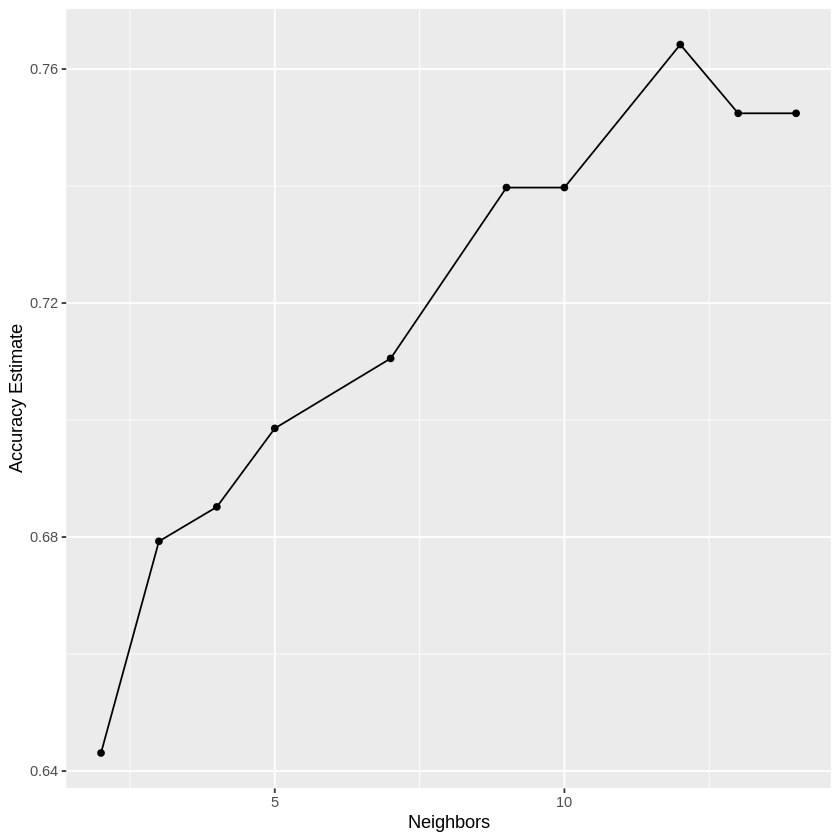

In [13]:
set.seed(1234)

accuracies <- knn_results %>%
        filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
        geom_point() +
        geom_line() +
        labs(x = "Neighbors", y = "Accuracy Estimate") 
        

accuracy_versus_k

11 NEIGHBORS IS THE OPTIMUM PARAMETER

In [14]:
set.seed(1234)

heart_disease_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 11) %>%
  set_engine("kknn") %>%
  set_mode("classification")

heart_disease_workflow <- workflow() %>%
  add_recipe(heart_disease_recipe) %>%
  add_model(heart_disease_spec) %>%
  fit(data = heart_disease_train)

heart_disease_workflow

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~11, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2666667
Best kernel: rectangular
Best k: 11

In [15]:
set.seed(1234)

heart_disease_predictions <- predict(heart_disease_workflow, heart_disease_test) %>%
  bind_cols(heart_disease_test)

heart_disease_predictions

.pred_class,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,scaled_age,scaled_sex,scaled_cp,scaled_chol
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
<50% diameter narrowing,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,<50% diameter narrowing,-1.3284168,-1.297536,-0.9789676,-0.7957221
<50% diameter narrowing,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,<50% diameter narrowing,0.4076333,-1.297536,1.1031294,2.1648094
<50% diameter narrowing,58,0,1,150,283,1,2,162,0,1.0,1,0.0,3.0,<50% diameter narrowing,0.5161365,-1.297536,-2.0200161,0.7634912
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
<50% diameter narrowing,67,1,3,152,212,0,2,150,0,0.8,2,0.0,7.0,>50% diameter narrowing,1.4926647,0.7671563,0.06208087,-0.6378270
<50% diameter narrowing,55,0,2,132,342,0,0,166,0,1.2,1,0.0,3.0,<50% diameter narrowing,0.1906271,-1.2975359,-0.97896763,1.9279669
<50% diameter narrowing,63,0,4,124,197,0,0,136,1,0.0,2,0.0,3.0,>50% diameter narrowing,1.0586521,-1.2975359,1.10312938,-0.9338802


In [16]:
set.seed(1234)

heart_disease_predictions %>%
  metrics(truth = num, estimate = .pred_class) %>%
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8113208


In [17]:
confusion <- heart_disease_predictions %>%
             conf_mat(truth = num, estimate = .pred_class)

confusion

                         Truth
Prediction                 2 >50% diameter narrowing <50% diameter narrowing  3
  2                        0                       0                       0  0
  >50% diameter narrowing  0                       4                       1  0
  <50% diameter narrowing  0                       9                      39  0
  3                        0                       0                       0  0
  4                        0                       0                       0  0
                         Truth
Prediction                 4
  2                        0
  >50% diameter narrowing  0
  <50% diameter narrowing  0
  3                        0
  4                        0

==================VIZ==================

In [23]:
heart_greater_50 <- heart_disease %>%
filter(num == ">50% diameter narrowing")

heart_greater_50



age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,>50% diameter narrowing
53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,>50% diameter narrowing
48,1,2,110,229,0,0,168,0,1.0,3,0.0,7.0,>50% diameter narrowing
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,>50% diameter narrowing
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,>50% diameter narrowing
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,>50% diameter narrowing


age
<dbl>
67
53
48
⋮
57
45
57


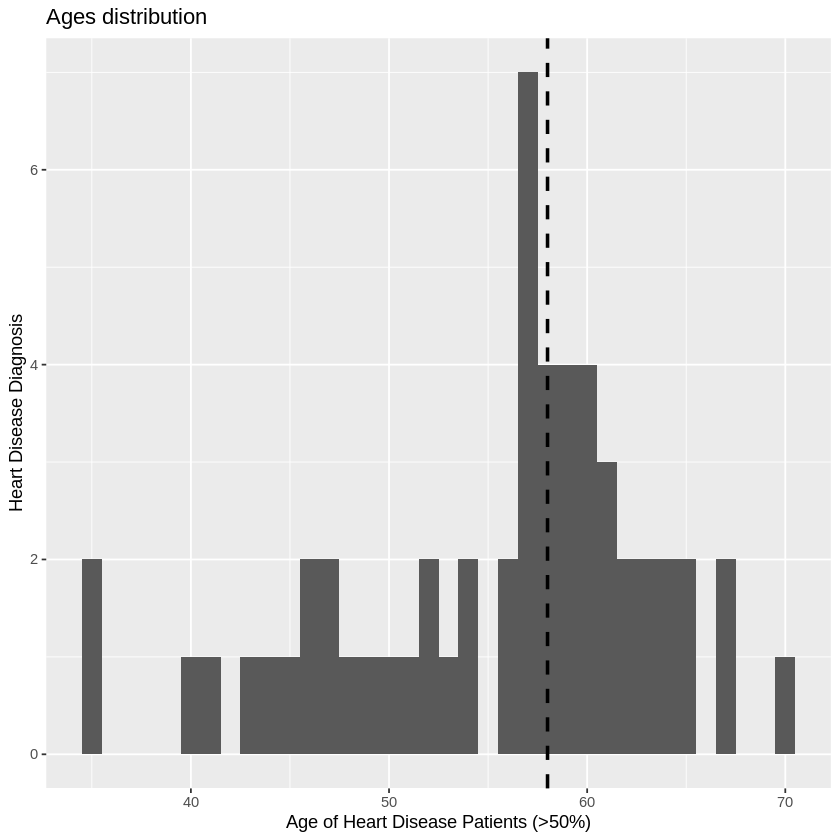

In [24]:
heart_50_age <- heart_greater_50 %>% 
select(age)

heart_50_age

heart_50_age_hist <- ggplot(heart_50_age, aes(x = age)) + 
    geom_histogram(binwidth = 1) +
geom_vline(xintercept = 58, linetype = "dashed", size = 1.0)+
    xlab("Age of Heart Disease Patients (>50%)") +
    ylab("Heart Disease Diagnosis")+
    ggtitle("Ages distribution")
heart_50_age_hist

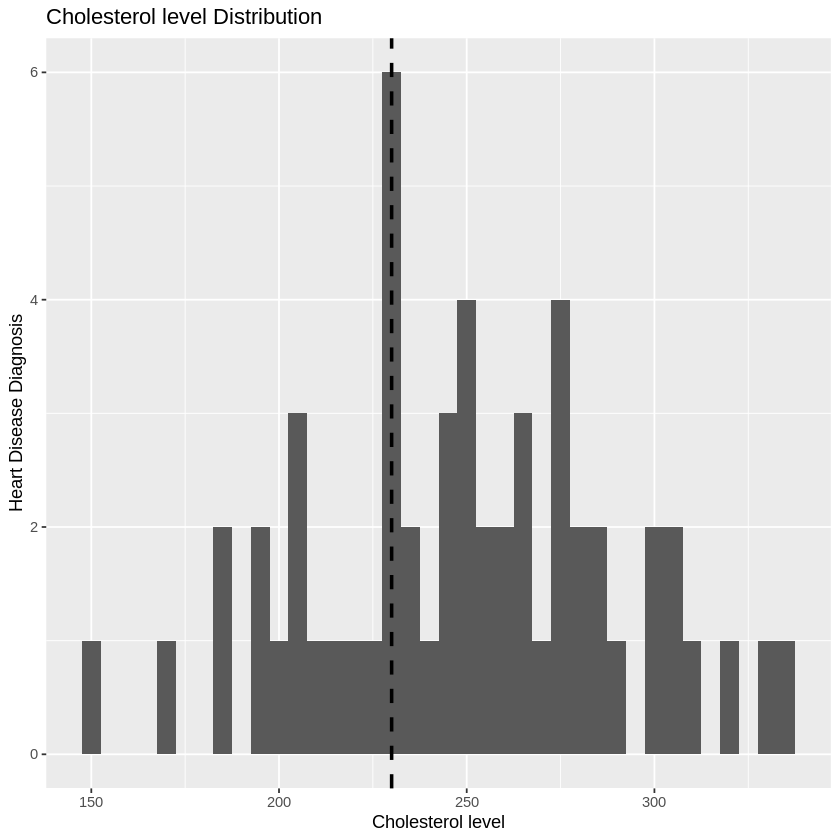

In [25]:
heart_50_chol <- heart_greater_50 %>% 
select(chol)


chol_plot <- heart_50_chol %>%
ggplot(aes(x = chol)) +
geom_histogram(binwidth = 5) +
geom_vline(xintercept = 230, linetype = "dashed", size = 1.0)+
xlab("Cholesterol level") +
ylab("Heart Disease Diagnosis")+
ggtitle("Cholesterol level Distribution")

chol_plot

cp
<chr>
asymptomatic
asymptomatic
atypical angina
⋮
asymptomatic
typical angina
atypical angina


Warning message:
“Ignoring unknown parameters: binwidth”


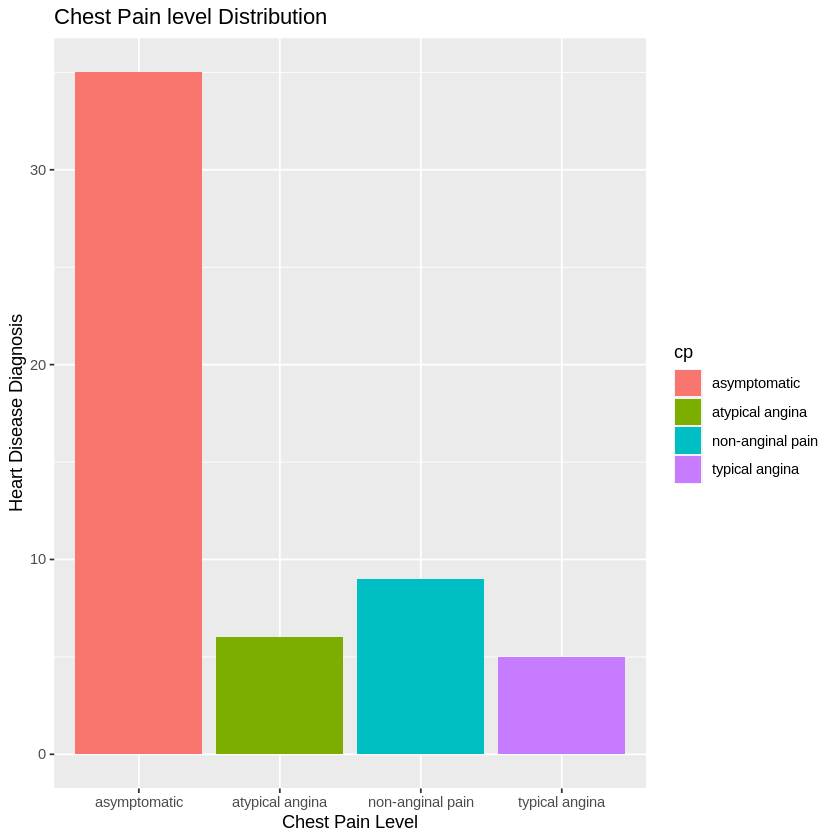

In [26]:
heart_50_cp <- heart_greater_50 %>% 
select(cp)

heart_50_cp$cp[heart_50_cp$cp==1] <-"typical angina"
heart_50_cp$cp[heart_50_cp$cp==2] <-"atypical angina"
heart_50_cp$cp[heart_50_cp$cp==3] <-"non-anginal pain"
heart_50_cp$cp[heart_50_cp$cp==4] <-"asymptomatic"

heart_50_cp

cp_plot <- heart_50_cp %>%
ggplot(aes(x = cp, fill = cp)) +
geom_bar(binwidth = 1) +
xlab("Chest Pain Level") +
ylab("Heart Disease Diagnosis")+
ggtitle("Chest Pain level Distribution")

cp_plot

sex
<chr>
male
male
male
⋮
female
male
female


Warning message:
“Ignoring unknown parameters: binwidth”


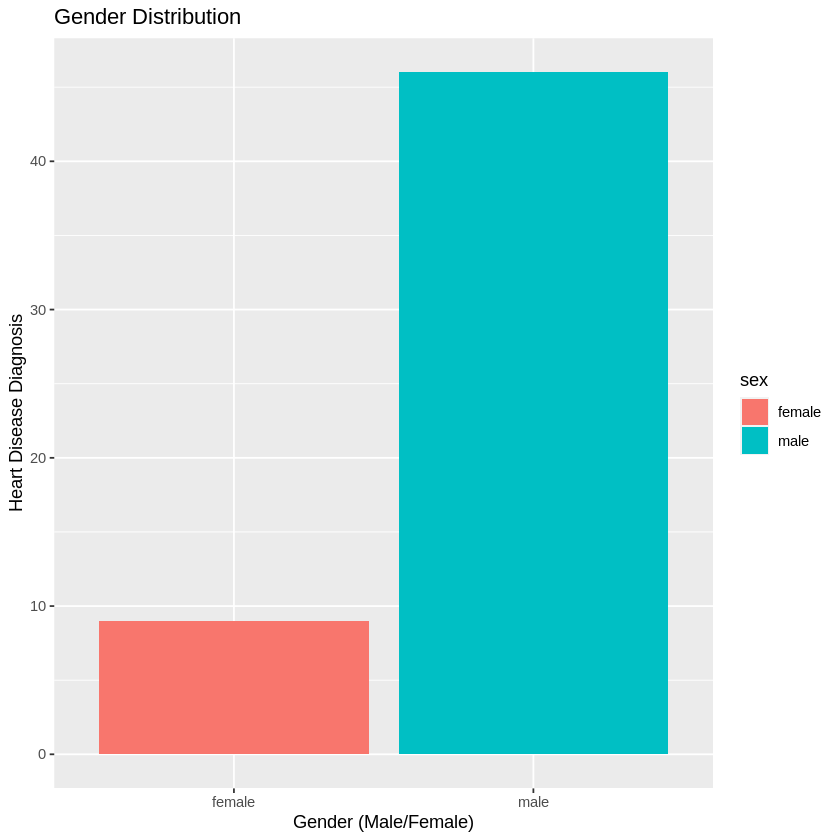

In [27]:
heart_50_sex <- heart_greater_50 %>% 
select(sex)

heart_50_sex$sex[heart_50_sex$sex==1] <-"male"
heart_50_sex$sex[heart_50_sex$sex==0] <-"female"

heart_50_sex


sex_plot <- heart_50_sex %>%
ggplot(aes(x = sex, fill = sex)) +
geom_bar(binwidth = 1) +
xlab("Gender (Male/Female)") +
ylab("Heart Disease Diagnosis")+
ggtitle("Gender Distribution")

sex_plot